In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('data/toxic_comment/train.csv')
test_df = pd.read_csv('data/toxic_comment/test.csv')
sample_df = pd.read_csv('data/toxic_comment/sample_submission.csv')

# Check data structure

In [3]:
train_df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
test_df.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [5]:
sample_df.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
5,0001ea8717f6de06,0.5,0.5,0.5,0.5,0.5,0.5
6,00024115d4cbde0f,0.5,0.5,0.5,0.5,0.5,0.5
7,000247e83dcc1211,0.5,0.5,0.5,0.5,0.5,0.5
8,00025358d4737918,0.5,0.5,0.5,0.5,0.5,0.5
9,00026d1092fe71cc,0.5,0.5,0.5,0.5,0.5,0.5


# Understand the data

In [6]:
# Reads in both training and testing dataset
train = pd.read_csv('data/toxic_comment/train.csv')
test = pd.read_csv('data/toxic_comment/test.csv')

In [7]:
columns = train_df.columns[2:]
print(train_df.shape, test_df.shape)
total_comments = train_df.shape[0] + test_df.shape[0]
total_comments

(159571, 8) (153164, 2)


312735

In [8]:
x = train_df.iloc[:,2:].sum()
row_sums = train_df.iloc[:, 2:].sum(axis=1)
train['clean'] = (row_sums == 0)

In [9]:
print("Total comments = ", len(train_df))
print("Total clean comments = ", train['clean'].sum())
print("Total tags =",int(x.sum()))

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


# Clean Data

In [10]:
merge_df = pd.concat([train_df.iloc[:,0:2], test_df.iloc[:,0:2]])

In [11]:
df = merge_df.reset_index(drop=True)
merge_df.reset_index(drop=True, inplace=True) #Need to do this to get a unique identifier for the clean corpus

In [12]:
from nltk import TweetTokenizer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
import nltk
import time
import re

In [13]:
bag_of_words = [
    ['\n', " "],
    ['\?', " "], 
    ["\[.*\]"," "],
    ["\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}"," "],
    ["don't","do not"],
    ["doesn't", "does not"],
    ["didn't", "did not"],
    ["hasn't", "has not"],
    ["haven't", "have not"],
    ["hadn't", "had not"],
    ["won't", "will not"],
    ["wouldn't", "would not"],
    ["can't", "can not"],
    ["cannot", "can not"],
    ["i'm", "i am"],
    ["i'll", "i will"],
    ["its", "it is"],
    ["it's", "it is"],
    ["that's", "that is"],
    ["weren't", "were not"],
    ["i'd","i would"],
    ["i've","i have"],
    ["she'd","she would"],
    ["they'll","they will"],
    ["they're","they are"],
    ["we'd","we would"],
    ["we'll","we will"],
    ["we've","we have"],
    ["it'll","it will"],
    ["there's","there is"],
    ["where's","where is"],
    ["they're","they are"],
    ["let's","let us"],
    ["couldn't","could not"],
    ["shouldn't","should not"],
    ["wasn't","was not"],
    ["could've","could have"],
    ["might've","might have"],
    ["must've","must have"],
    ["should've","should have"],
    ["would've","would have"],
    ["who's","who is"],
    ["\bim\b", "i am"],
    [r'[^\w\s]',''],
    ["\d+", ""],
    ["what's", "what is "],
    [r" e g ", " eg "],
    [r" b g ", " bg "],
    [r" 9 11 ", "911"]
]

In [14]:
lemmatizer = WordNetLemmatizer() 
tokenizer = TweetTokenizer()

def clean_text(text):
    # Clean text and remove stopwords
    text = text.lower()
    
    for selection in bag_of_words:
        text = re.sub(selection[0], selection[1], text)
    
    toknized_text = tokenizer.tokenize(text)
    lemetized = []
    
    for word, tag in nltk.pos_tag(toknized_text):
        if tag == "NN":
            # NN: noun, common, singular or mass
            lemetized.append(lemmatizer.lemmatize(word, pos='n'))
        elif tag == "VB":
            # VB: verb, base form
            lemetized.append(lemmatizer.lemmatize(word, pos='v'))
        elif tag == "R":
            # JJ: adjective or numeral, ordinal
            lemetized.append(lemmatizer.lemmatize(word, pos='r'))
        elif tag == "JJ":
            # R: adverb
            lemetized.append(lemmatizer.lemmatize(word, pos='a'))
        else:
            lemetized.append(word)
            
    return " ".join(lemetized)

In [15]:
# Clean corpus
start_time = time.time()
cleaned_corpus = []
for c in merge_df.comment_text:
    cleaned_corpus.append(clean_text(c))

print("Total time to clean data", time.time() - start_time)

Total time to clean data 621.7195677757263


In [16]:
# Separates the training and testing features
train_feats = df.iloc[0:len(train),]
test_feats = df.iloc[len(train):,]
print(train_feats.shape, test_feats.shape)

# Join the Tags for each comment with the features we calculated before
train_tags = train.iloc[:, 2:]
train_feats=pd.concat([train_feats,train_tags],axis=1)

(159571, 2) (153164, 2)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [18]:
# Get term frequency
start_time = time.time()
tfidf = TfidfVectorizer(
    min_df=200, max_features=10000, strip_accents = 'unicode',
    analyzer = 'word', ngram_range = (1,1), use_idf = 1,
    smooth_idf = 1,sublinear_tf = True, stop_words = 'english'
)
tfidf.fit(cleaned_corpus)
features = np.array(tfidf.get_feature_names())
print("Total time to compute unigrams",time.time()- start_time)

Total time to compute unigrams 10.593738079071045


In [19]:
# Get word frequency
cv = CountVectorizer(
    min_df=200, max_features=10000, strip_accents = 'unicode'
)
cv.fit(cleaned_corpus)
vocab = cv.vocabulary_
vector = cv.transform(cleaned_corpus)

# summarize encoded vector
print("Summary\n============")
print('Shape: {}'.format(vector.shape))
print('Type: {}'.format(type(vector)))
print('Value: {}'.format(vector.toarray()))

Summary
Shape: (312735, 4762)
Type: <class 'scipy.sparse.csr.csr_matrix'>
Value: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Data Visualization

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

In [21]:
color = sns.color_palette()
eng_stopwords = set(stopwords.words('english'))

row_sums = train.iloc[:,2:].sum(axis=1)
train['clean'] = (row_sums==0)

Text(0.5, 1.0, 'Frequency of toxic')

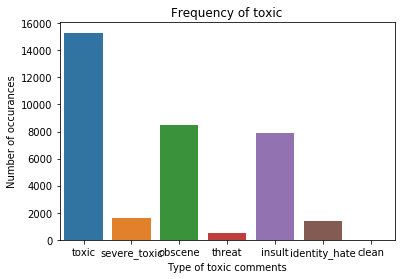

In [22]:
# Visualize the frequencies 
data = train.iloc[:, 2:].sum().astype(int)
sns.barplot(data.index, data.values)
plt.xlabel('Type of toxic comments')
plt.ylabel('Number of occurances')
plt.title('Frequency of toxic')

Text(0.5, 0, 'No of tags ')

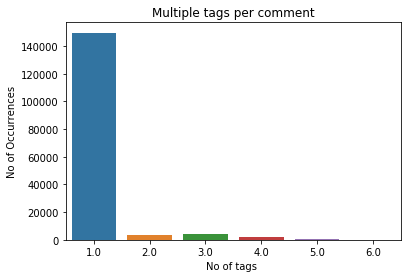

In [23]:
data = row_sums.value_counts()
sns.barplot(data.index, data.values)
plt.title("Multiple tags per comment")
plt.ylabel('No of Occurrences')
plt.xlabel('No of tags ' )

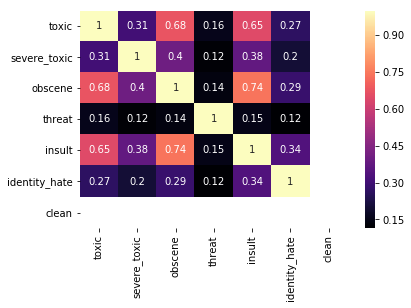

In [24]:
# Get heatmap from correlations
data = train.iloc[:, 2:]
correlations = data.corr()
sns.heatmap(
    correlations, cmap='magma',
    xticklabels=correlations.columns.values,
    yticklabels=correlations.columns.values, 
    annot=True
)

In [25]:
# clean comments
# clean = train[train.clean==True]
# bag_clean = clean.comment_text.values

# toxic = train[train.toxic==True]
# bag_toxic = toxic.comment_text.values

# severe_toxic = train[train.severe_toxic==True]
# bag_severe_toxic = severe_toxic.comment_text.values

# obscene=train[train.obscene==1]
# bag_obscene=obscene.comment_text.values

# insult=train[train.insult==1]
# bag_insult=insult.comment_text.values

# threat=train[train.threat==1]
# bag_threat=threat.comment_text.values

# identity_hate=train[train.identity_hate==1]
# bag_identity_hate=identity_hate.comment_text.values
temp_df = train.iloc[:, 2:]

data_bag = []
bags = list(temp_df.columns)
for column in temp_df.columns:
    data_bag.append(
        train[train[column] == True].comment_text.values
    )

In [26]:
from wordcloud import WordCloud
from PIL import Image

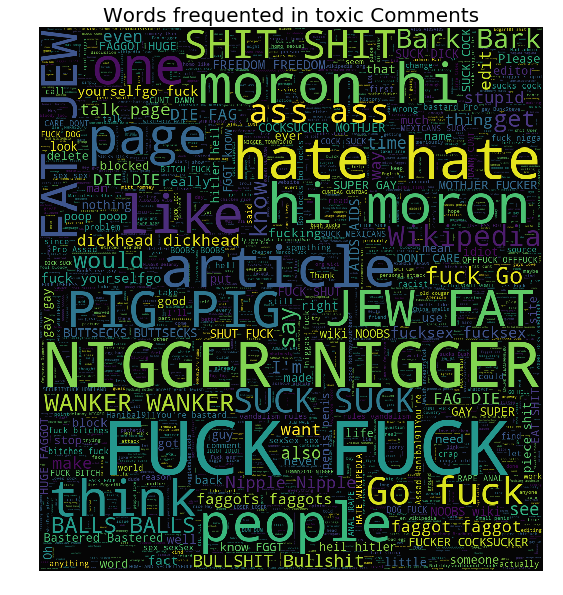

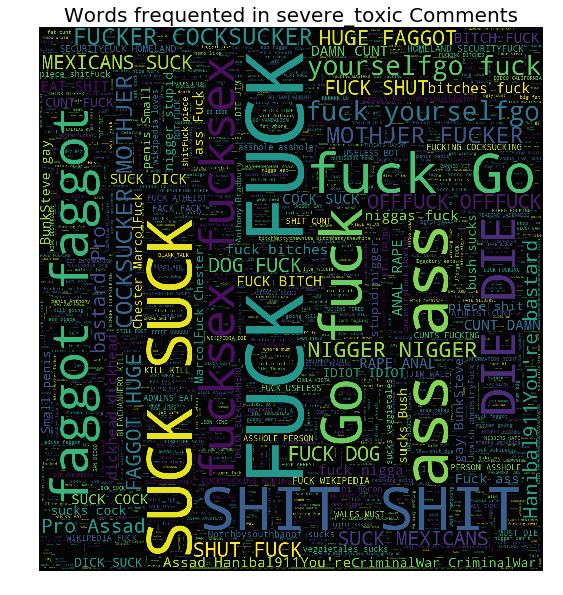

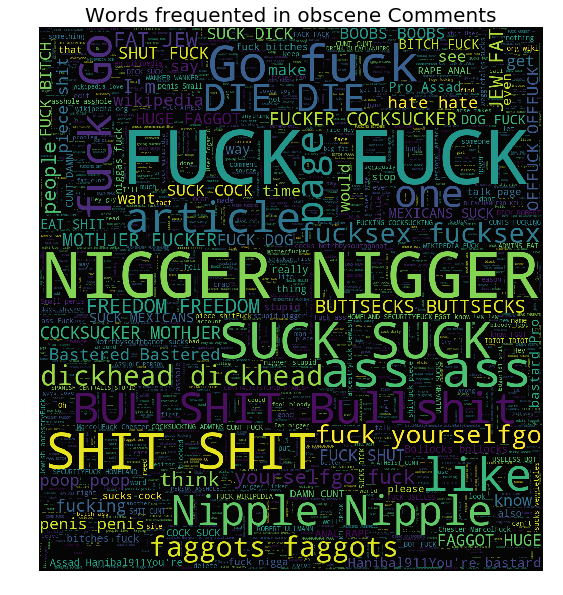

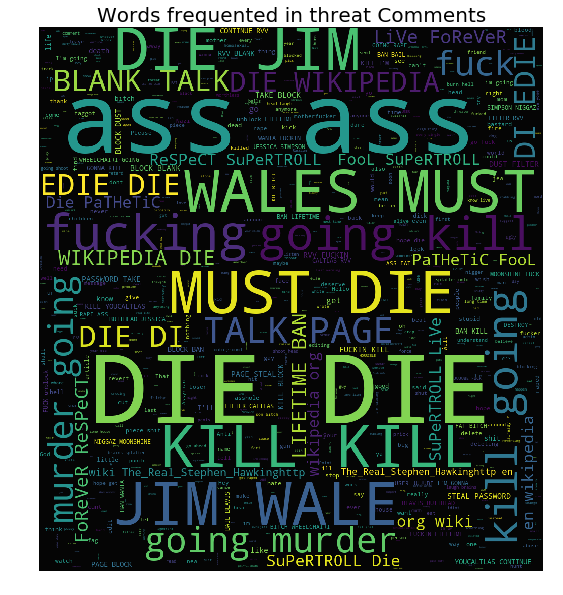

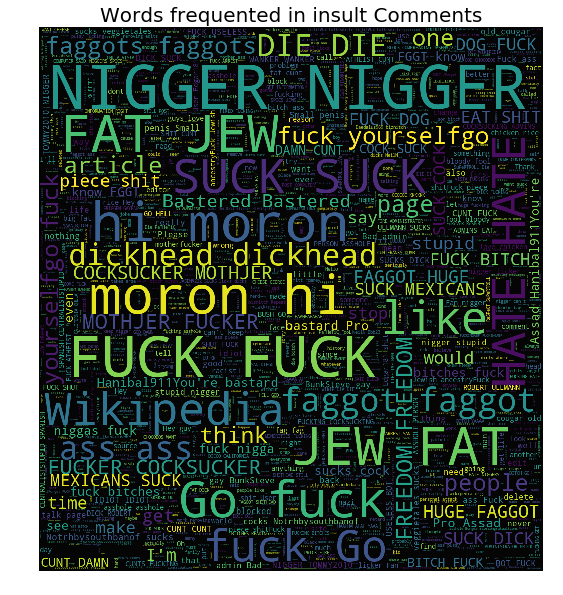

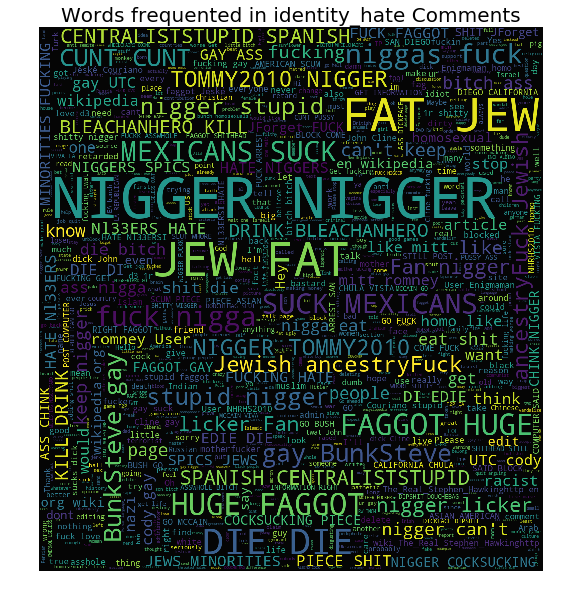

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [27]:
def create_word_cloud(data_bag, index):
    clean_mask=np.array(Image.open("peace.png"))
    clean_mask=clean_mask[:,:,1]
    wc= WordCloud(background_color="black",max_words=2000,mask=clean_mask,stopwords=eng_stopwords)
    wc.generate(" ".join(data_bag))
    plt.figure(figsize=(20,10))
    plt.axis("off")
    plt.title("Words frequented in " + bags[index] +" Comments", fontsize=20)
    plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
    plt.show()

for index, bag in enumerate(data_bag):
    create_word_cloud(bag, index)

# Feature Extraction

In [ ]:
df['word_count'] = df['comment_text'].apply(
    lambda x: len(re.findall(pattern='[a-zA-Z]{2,25}', string=x))
)